<a href="https://colab.research.google.com/github/prathikbannimath/Million-Songs-Recommendation/blob/main/Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###
Prediction of stock prices using rnn and lstm 


In [1]:
#importing libraries
import math
import pandas as pd
import pandas_datareader as pdd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')



In [4]:
#Get the Stock Quote
df = pdd.DataReader('AAPL', data_source = 'yahoo', start = '2012-01-01', end = '2019-12-17')
#show the data
df.head() 

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.629209
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.697079
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.838044
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.972249
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.951672


In [5]:
#getting the number of shows and colums
df.shape

(2003, 6)

<function matplotlib.pyplot.show>

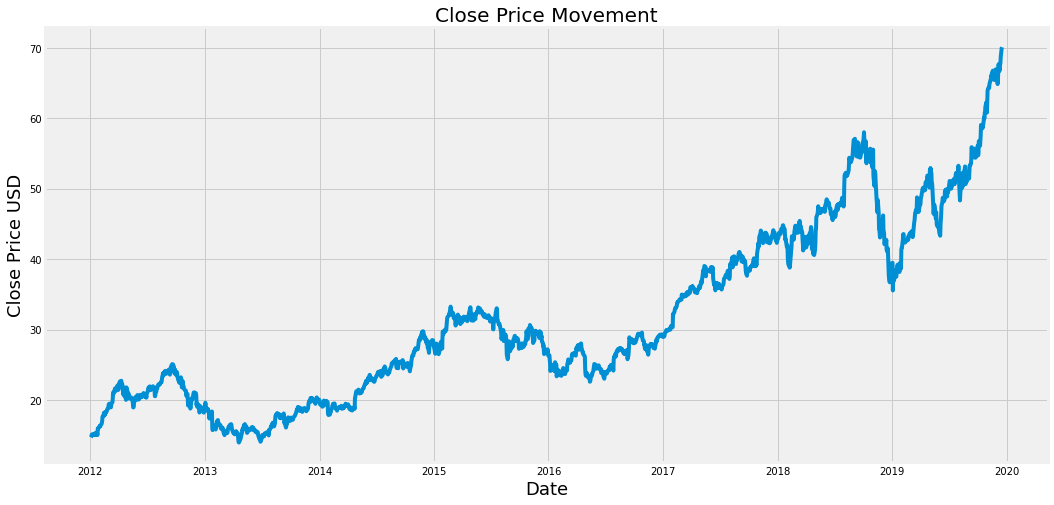

In [6]:
# Visualize the close price history
plt.figure(figsize=(16,8))
plt.title('Close Price Movement',fontsize=20)
plt.plot(df['Close'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD', fontsize = 18)
plt.show

In [8]:
#Create a new dataframe with only 'Close Colum'
data = df.filter(['Close'])
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil( len(dataset)* .8)
training_data_len

1603

In [9]:
# Normalise the data to values between 0 and 1 (Scaling the data)
scaler= MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.01316509],
       [0.01457063],
       [0.01748985],
       ...,
       [0.97658263],
       [0.99755134],
       [1.        ]])

In [12]:
# Specifying the shape of the input. Lshm must be in 3d (Creating the scaled dataset)
train_data = scaled_data[0:training_data_len, :]
#splitting the training set into x variable and y variable
x_train = []
y_train = []
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60: i])
  y_train.append(train_data[i,0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()


[array([[0.01316509],
       [0.01457063],
       [0.01748985],
       [0.02026915],
       [0.01984303],
       [0.02080338],
       [0.02036454],
       [0.01962679],
       [0.01862191],
       [0.02173194],
       [0.02453668],
       [0.02367172],
       [0.01893355],
       [0.02345548],
       [0.01900352],
       [0.03569838],
       [0.03440732],
       [0.0360927 ],
       [0.03973694],
       [0.04194384],
       [0.0417594 ],
       [0.0410789 ],
       [0.04397903],
       [0.04670744],
       [0.04979839],
       [0.05479095],
       [0.0652785 ],
       [0.06543749],
       [0.07127594],
       [0.07563885],
       [0.06814049],
       [0.07102789],
       [0.07097066],
       [0.07906688],
       [0.07791571],
       [0.08004628],
       [0.08387497],
       [0.08600558],
       [0.09214292],
       [0.09661394],
       [0.09790501],
       [0.09835659],
       [0.09071194],
       [0.08886753],
       [0.08914103],
       [0.09632778],
       [0.09835024],
       [0.10

In [13]:
# converge x_train and y_train to numpy array  to train the lshm model
x_train, y_train = np.array(x_train), np.array(y_train)
#reshaping the data 
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1543, 60, 1)

In [14]:
#Building The LSTM model
model = Sequential()
model.add(LSTM (50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM (50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))


In [17]:
# Compile the model
model.compile(optimizer = 'adam' , loss = 'mean_squared_error')


In [18]:
#Training the model
model.fit(x_train, y_train, batch_size = 1, epochs = 1)


1543/1543 [==============================] - 54s 23ms/step - loss: 0.0021


In [20]:
# Creating the testing Dataset
#creating New array containing saled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60: , :]\
# create the dataset x_tests and y_tests
x_test = []
y_test = dataset[training_data_len : , :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60 : i, 0])
  

In [21]:
#Convert data to numpy array
x_test = np.array(x_test)


In [22]:
#Reshaping the data
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))

In [24]:
#Gettinmg the model predicted prive valuies
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [27]:
# Getiing the root mean square error (RMSE)
rmse = np.sqrt ( np.mean(predictions - y_test)**2)
rmse

2.8136813163757326

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


<function matplotlib.pyplot.show>

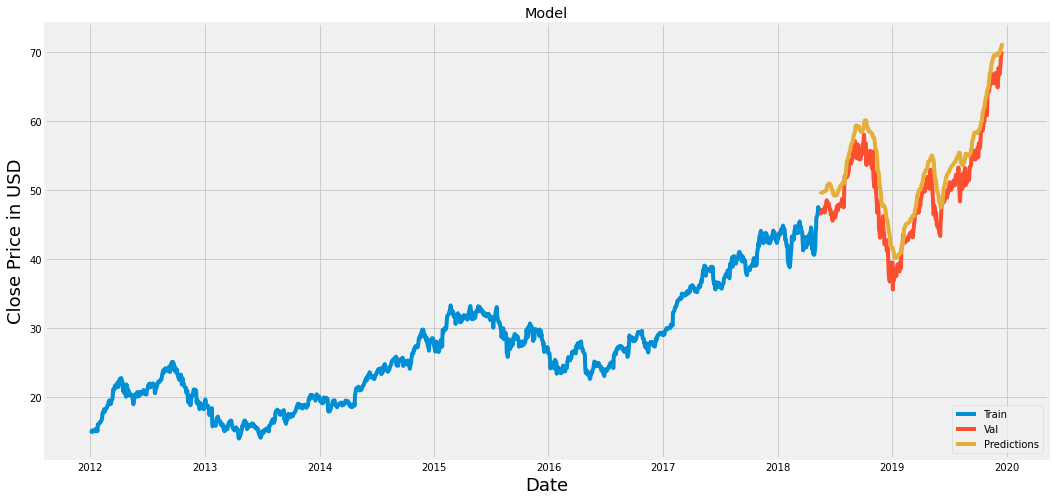

In [33]:
#plotting the data
train = data[ :training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#visualizingt the data
plt.figure(figsize= (16,8))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price in USD', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val' , 'Predictions'] , loc = 'lower right')
plt.show

In [34]:
# Shoe the valid or Actuall price and the preditcted Price
valid

,Close,Predictions
Date,,
2018-05-17,46.747501,49.398170
2018-05-18,46.577499,49.510239
2018-05-21,46.907501,49.552856
2018-05-22,46.790001,49.595081
2018-05-23,47.090000,49.618294
...,...,...
2019-12-11,67.692497,70.039810
2019-12-12,67.864998,70.257408
2019-12-13,68.787498,70.492195


In [ ]:
#Getting the quote
#apple_quote = pdd.DataReader('AAPL', data_source = 'yahoo' , start = '2012-01-01', end = '2019-12-17')
#creating a new dataframe
#new_df = apple_quote.filter(['Close'])
